In [1]:
! pip install neuralprophet

In [2]:
# package
import numpy as np
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

from neuralprophet import NeuralProphet, set_random_seed, set_log_level; set_log_level("ERROR", "INFO")
from neuralprophet.df_utils import make_future_df, fill_linear_then_rolling_avg, add_missing_dates_nan


import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True); sns.set_style("whitegrid")

import time

from collections import defaultdict

import copy

import pickle




set_log_level("ERROR")


In [3]:
train_df = pd.read_csv('../kaggle_data/train.csv')
test_df = pd.read_csv('../kaggle_data/test.csv')

In [4]:
input = pd.read_csv('../kaggle_data/input.csv')

In [5]:
input

,Unnamed: 0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,2019-08-01,3.007682,7.239156,1.073138,1.310777,1.544148,0.926372,0.674981,2.691544,1.486542,...,1.150575,5.916088,4.062681,30.183279,6.115724,2.640386,26.433363,4.612016,2.603246,1.548594
1,2019-09-01,2.884870,7.290936,0.995794,1.305176,1.575892,0.998556,0.739265,2.703752,1.355156,...,1.150575,5.894528,3.888567,31.712736,6.142085,2.858371,26.611856,4.338306,2.683593,1.530794
2,2019-10-01,3.055843,7.425439,1.160149,1.254761,1.546415,0.974495,0.713551,2.693764,1.355156,...,1.150575,5.881592,3.903076,31.990431,6.181626,2.913635,26.736261,4.420419,2.635385,1.530794
3,2019-11-01,2.993233,7.426071,1.000628,1.254761,1.573625,1.022618,1.054256,2.739270,1.362664,...,1.200600,5.954897,3.845038,32.776520,6.234348,3.008812,26.920164,4.372520,2.683593,1.601994
4,2019-12-01,2.993233,7.470274,1.000628,1.265965,1.555485,1.034649,1.054256,2.729281,1.343894,...,1.200600,5.911776,3.845038,32.806427,6.273890,3.088637,26.903938,4.310935,2.635385,1.584194
5,2020-01-01,2.969090,7.413655,1.027229,1.253638,1.573217,1.060717,1.060871,2.719628,1.319910,...,1.218893,5.901441,3.890260,32.847649,6.353848,3.150922,26.684565,4.367864,2.666882,1.590706
6,2020-02-01,2.909326,7.282522,1.022314,1.248041,1.536999,1.036333,1.060871,2.745211,1.331096,...,1.269680,5.871155,3.716069,32.246933,6.486774,3.169494,26.738255,4.237172,2.699208,1.519214
7,2020-03-01,2.933231,7.309610,1.032144,1.264831,1.541526,1.060717,1.009121,2.756335,1.301268,...,1.269680,5.897114,3.527362,32.856171,7.018477,3.237588,26.668457,4.182143,2.699208,1.537087
8,2020-04-01,3.000167,7.568799,1.086209,1.270428,1.577744,1.011948,0.996183,2.818625,1.327368,...,1.269680,5.979319,3.469299,34.142807,6.965306,3.293302,27.119463,4.195900,2.683045,1.554960
9,2020-05-01,3.004948,7.603275,1.081294,1.287217,1.575481,0.890027,0.996183,2.834197,1.342282,...,1.320467,6.005279,3.483815,40.916836,7.257743,3.311873,27.414764,4.443527,2.731534,1.608579


In [6]:
input = input.rename(columns={'Unnamed: 0': 'ds', '1001': 'y'})

In [7]:
input

,ds,y,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,2019-08-01,3.007682,7.239156,1.073138,1.310777,1.544148,0.926372,0.674981,2.691544,1.486542,...,1.150575,5.916088,4.062681,30.183279,6.115724,2.640386,26.433363,4.612016,2.603246,1.548594
1,2019-09-01,2.884870,7.290936,0.995794,1.305176,1.575892,0.998556,0.739265,2.703752,1.355156,...,1.150575,5.894528,3.888567,31.712736,6.142085,2.858371,26.611856,4.338306,2.683593,1.530794
2,2019-10-01,3.055843,7.425439,1.160149,1.254761,1.546415,0.974495,0.713551,2.693764,1.355156,...,1.150575,5.881592,3.903076,31.990431,6.181626,2.913635,26.736261,4.420419,2.635385,1.530794
3,2019-11-01,2.993233,7.426071,1.000628,1.254761,1.573625,1.022618,1.054256,2.739270,1.362664,...,1.200600,5.954897,3.845038,32.776520,6.234348,3.008812,26.920164,4.372520,2.683593,1.601994
4,2019-12-01,2.993233,7.470274,1.000628,1.265965,1.555485,1.034649,1.054256,2.729281,1.343894,...,1.200600,5.911776,3.845038,32.806427,6.273890,3.088637,26.903938,4.310935,2.635385,1.584194
5,2020-01-01,2.969090,7.413655,1.027229,1.253638,1.573217,1.060717,1.060871,2.719628,1.319910,...,1.218893,5.901441,3.890260,32.847649,6.353848,3.150922,26.684565,4.367864,2.666882,1.590706
6,2020-02-01,2.909326,7.282522,1.022314,1.248041,1.536999,1.036333,1.060871,2.745211,1.331096,...,1.269680,5.871155,3.716069,32.246933,6.486774,3.169494,26.738255,4.237172,2.699208,1.519214
7,2020-03-01,2.933231,7.309610,1.032144,1.264831,1.541526,1.060717,1.009121,2.756335,1.301268,...,1.269680,5.897114,3.527362,32.856171,7.018477,3.237588,26.668457,4.182143,2.699208,1.537087
8,2020-04-01,3.000167,7.568799,1.086209,1.270428,1.577744,1.011948,0.996183,2.818625,1.327368,...,1.269680,5.979319,3.469299,34.142807,6.965306,3.293302,27.119463,4.195900,2.683045,1.554960
9,2020-05-01,3.004948,7.603275,1.081294,1.287217,1.575481,0.890027,0.996183,2.834197,1.342282,...,1.320467,6.005279,3.483815,40.916836,7.257743,3.311873,27.414764,4.443527,2.731534,1.608579


In [8]:
x = pd.DataFrame(input.iloc[:, 0:2])

In [12]:
test_df[test_df['cfips'] == 1003]

,row_id,cfips,first_day_of_month
1,1003_2022-11-01,1003,2022-11-01
3136,1003_2022-12-01,1003,2022-12-01
6271,1003_2023-01-01,1003,2023-01-01
9406,1003_2023-02-01,1003,2023-02-01
12541,1003_2023-03-01,1003,2023-03-01
15676,1003_2023-04-01,1003,2023-04-01
18811,1003_2023-05-01,1003,2023-05-01
21946,1003_2023-06-01,1003,2023-06-01


In [11]:
test_df[test_df['cfips'] == 1001]

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
3135,1001_2022-12-01,1001,2022-12-01
6270,1001_2023-01-01,1001,2023-01-01
9405,1001_2023-02-01,1001,2023-02-01
12540,1001_2023-03-01,1001,2023-03-01
15675,1001_2023-04-01,1001,2023-04-01
18810,1001_2023-05-01,1001,2023-05-01
21945,1001_2023-06-01,1001,2023-06-01


In [54]:
x

,ds,y
0,2019-08-01,3.007682
1,2019-09-01,2.884870
2,2019-10-01,3.055843
3,2019-11-01,2.993233
4,2019-12-01,2.993233
5,2020-01-01,2.969090
6,2020-02-01,2.909326
7,2020-03-01,2.933231
8,2020-04-01,3.000167
9,2020-05-01,3.004948


In [6]:
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [7]:
# Input 

In [21]:
NP = NeuralProphet(
    growth='discontinuous',  
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=52, # Number of weeks in a month, looks at a potential changepoint evey month
    trend_reg=0, 
    trend_reg_threshold=False, # Requires regularization for trend to be changed
    yearly_seasonality=True, # Automatically fits yearly seasonality
    weekly_seasonality='auto', # Automatically fits weekly seasonality
    daily_seasonality='auto', # Automatically fits daily seasonality
    seasonality_mode='additive', # Additional (adds) seasonality instead of multiplicative (multiplies) seasonality
    seasonality_reg=0, # Due to the dataset being based on bike shares, visually will be very impacted by seasonality: set at maximum
    n_forecasts=8, # Set at default 1 for forecasting one step ahead
    n_lags=5, # To include 7 days worth of AR lag
    num_hidden_layers=4, # 8 hidden layers for the network
    d_hidden=32, # Dimension of hidden layers of AR-Net
    learning_rate=0.01, # Automatically determines learning rate
    epochs=100, # Automatically sets the learning rate (based on data size)
    loss_func='Huber', # Sets Huber loss function for robustness to outliers ### Describe Huber in presentation/write-up
    # normalize='auto',  # Type of normalization ('minmax', 'standardize', 'soft', 'auto', None) ## Why normalize again?
)

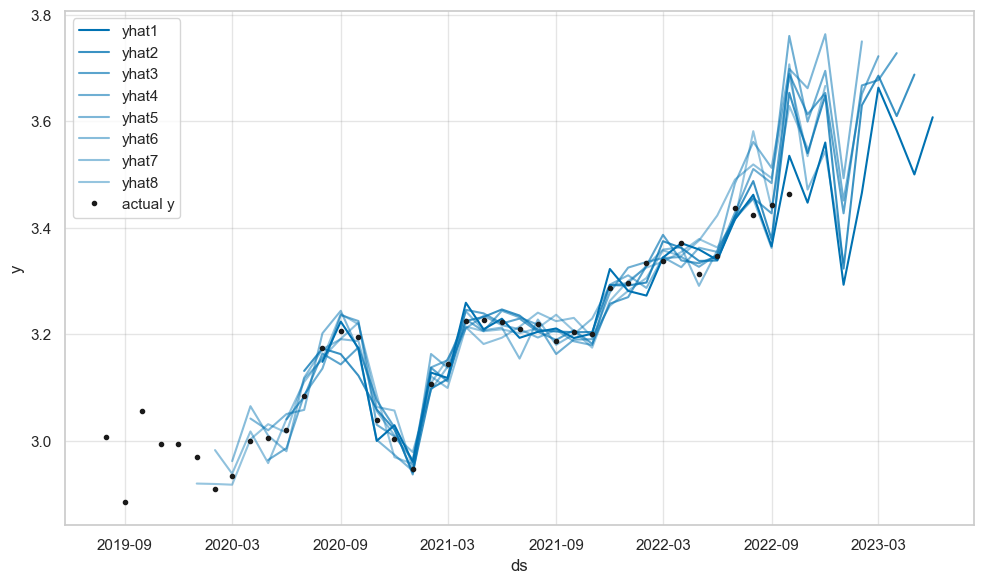

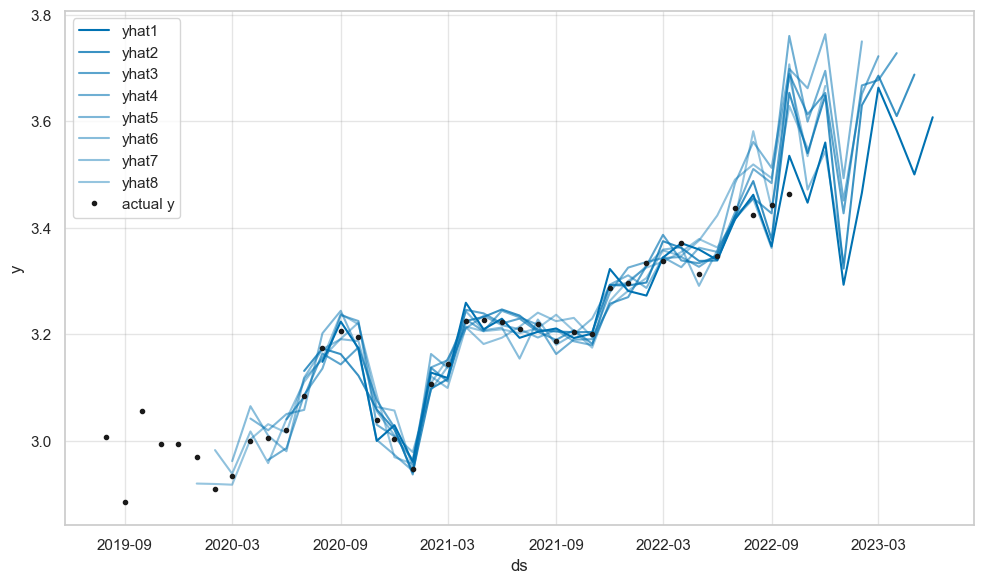

In [22]:
# symbol = industry_symbol[0]

metrics = NP.fit(x)


# test_inp = pd.DataFrame(test[symbol_to_index_map[symbol]])
# test_inp=test_inp.reset_index()
# test_inp=test_inp.rename(columns = {'index' : 'ds', symbol_to_index_map[symbol]:'y'})
future = NP.make_future_dataframe(df=x, periods=8, n_historic_predictions=len(x))
forecast = NP.predict(df=future)

NP.plot(forecast)

In [23]:
forecast

,ds,y,residual1,yhat1,residual2,yhat2,residual3,yhat3,residual4,yhat4,...,ar1,ar2,ar3,ar4,ar5,ar6,ar7,ar8,trend,season_yearly
0,2019-08-01,3.007682,NaN,None,NaN,None,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,None
1,2019-09-01,2.884870,NaN,None,NaN,None,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,None
2,2019-10-01,3.055843,NaN,None,NaN,None,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,None
3,2019-11-01,2.993233,NaN,None,NaN,None,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,None
4,2019-12-01,2.993233,NaN,None,NaN,None,NaN,None,NaN,None,...,None,None,None,None,None,None,None,None,None,None
5,2020-01-01,2.969090,-0.049803,2.919287,NaN,None,NaN,None,NaN,None,...,1.009928,None,None,None,None,None,None,None,2.120703,-0.211343
6,2020-02-01,2.909326,0.009159,2.918484,0.072848,2.982173,NaN,None,NaN,None,...,0.881745,0.945434,None,None,None,None,None,None,2.068224,-0.031485
7,2020-03-01,2.933231,-0.016109,2.917123,0.004551,2.937783,0.028155,2.961386,NaN,None,...,0.909719,0.930378,0.953982,None,None,None,None,None,1.996,0.011404
8,2020-04-01,3.000167,0.002257,3.002424,0.017027,3.017194,0.064496,3.064663,0.041315,3.041483,...,0.910703,0.925473,0.972942,0.949762,None,None,None,None,2.099155,-0.007434
9,2020-05-01,3.004948,0.025976,3.030925,-0.047231,2.957717,0.00451,3.009459,0.014412,3.019361,...,1.003763,0.930555,0.982297,0.992199,0.93651,None,None,None,2.049276,-0.022114


In [28]:
y_hat = ['yhat1', 'yhat2', 'yhat3', 'yhat4', 'yhat5','yhat6','yhat7', 'yhat8']
date = ['2022-11-01','2022-12-01','2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01','2023-06-01' ]



# for i in forecast['ds']:
print(forecast[forecast['ds']=='2021-03-01']['yhat1'])

19    3.153197
Name: yhat1, dtype: object
